# Финальный проект по SQL
# Анализ базы данных сервиса чтения книг

## Цель
Компания купила крупный сервис для чтения книг по подписке. В базе данных информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Задача
Проанализировать базу данных сервиса для чтения книг по подписке.

- Посчитать, сколько книг вышло после 1 января 2000 года.
- Для каждой книги посчитать количество обзоров и среднюю оценку.
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так будут исключены из анализа брошюры.
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками.
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Схема данных
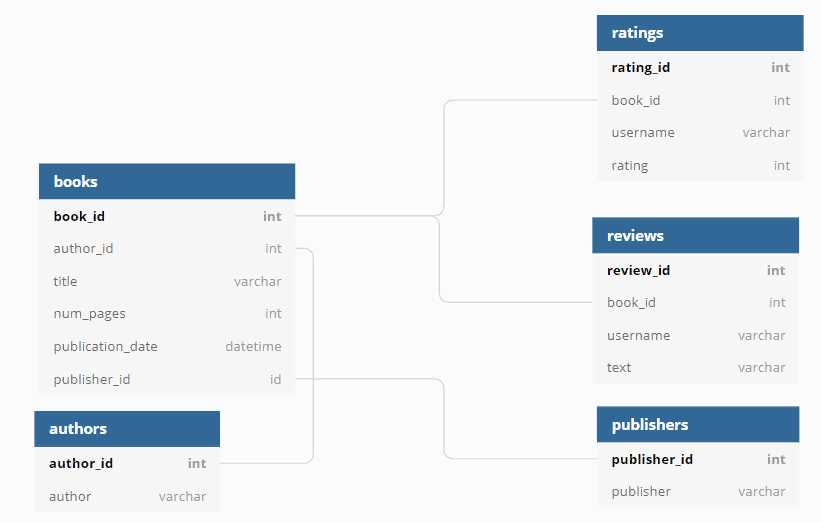

## Описание данных

1. Таблица __books__ содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

2. Таблица __authors__ содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

3. Таблица __publishers__ содержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

4. Таблица __ratings__ содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

5. Таблица __reviews__ содержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

## Подготовка

In [1]:
# Импортируем библиотеки
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import inspect
from IPython.display import display
import matplotlib.pyplot as plt
import os

In [ ]:
# Устанавливаем параметры подключения к базе данных, чтобы не хранить в открытом виде
os.environ['user'] = 'praktikum_student'
os.environ['pwd'] = 'Sdf4$2;d-d30pp'
os.environ['host'] = 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net'
os.environ['port'] = '6432'
os.environ['db'] = 'data-analyst-final-project-db'

In [ ]:
# Подключаемся к базе данных
db_config = {
    'user': os.environ.get('user'),
    'pwd': os.environ.get('pwd'),
    'host': os.environ.get('host'),
    'port': os.environ.get('port'),
    'db': os.environ.get('db')
}

# Проверка, что переменные окружения установлены
if None in db_config.values():
    print("Убедитесь, что все необходимые переменные окружения установлены.")
else:
    print("Подключение к базе данных будет установлено со следующими параметрами:")
    print(db_config)

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

## Изучение данных

In [3]:
def query_data(query: str, engine: sa.engine.base.Engine=engine, count_rows: bool = False) -> pd.DataFrame:
    '''
    Функция для вывода первых 5 строк таблицы и
    подсчёта количества строк таблицы
    '''
    with engine.connect() as con:
        if count_rows:
            return pd.read_sql(sql=sa.text(query), con=con)
        else:
            data = pd.read_sql(sql=sa.text(query), con=con)
            return data.head() if len(data) > 5 else data

def get_columns_info(table_name: str, engine: sa.engine.base.Engine = engine) -> pd.DataFrame:
    '''
    Функция для получения информации о колонках таблицы
    '''
    insp = inspect(engine)
    columns_data = insp.get_columns(table_name)
    df_columns = pd.DataFrame(columns_data, columns=['name', 'type'])
    return df_columns

def get_all_tables(engine: sa.engine.base.Engine=engine) -> list:
    '''
    Функция получения списка всех таблиц в базе данных
    '''
    inspector = inspect(engine)
    return inspector.get_table_names()

In [4]:
# Цикл проверки всех таблиц
all_tables = get_all_tables()
for table_name in all_tables:
    print(f"\nТаблица: {table_name}")
    
    # Получаем информацию о количестве строк
    count_query = f"SELECT COUNT(*) FROM {table_name}"
    count_result = query_data(count_query, count_rows=True)
    print("\nКоличество строк:")
    print(count_result)

    # Получаем первые 5 строк
    head_query = f"SELECT * FROM {table_name}"
    head_result = query_data(head_query, count_rows=False)
    print("\nПервые 5 строк:")
    print(head_result)

    # Получаем информацию о колонках
    columns_info = get_columns_info(table_name)
    print("\nИнформация о колонках:")
    print(columns_info)
    print("\n")


Таблица: author

Количество строк:
   count
0    636

Первые 5 строк:
   index  author_id                          author
0      0          1                      A.S. Byatt
1      1          2  Aesop/Laura Harris/Laura Gibbs
2      2          3                 Agatha Christie
3      3          4                   Alan Brennert
4      4          5        Alan Moore/David   Lloyd

Информация о колонках:
        name    type
0      index  BIGINT
1  author_id  BIGINT
2     author    TEXT



Таблица: second

Количество строк:
   count
0    994

Первые 5 строк:
   book_id  count
0      652      2
1      273      2
2       51      5
3      951      2
4      839      4

Информация о колонках:
      name    type
0  book_id  BIGINT
1    count  BIGINT



Таблица: second_b

Количество строк:
   count
0   2000

Первые 5 строк:
   book_id       avg
0      652  4.500000
1      273  4.500000
2       51  4.250000
3      951  4.000000
4      839  4.285714

Информация о колонках:
      name            

In [5]:
# Функция для выполнения SQL-запроса и возврата данных в виде DataFrame
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con=con)

## Задача 1. Сколько книг вышло после 1 января 2000 года

In [6]:
# Получим количество книг, вышедших после 1 января 2000 года
query1 = '''
SELECT COUNT(*) AS books_count
FROM books
WHERE publication_date > '2000-01-01';
'''
result1 = get_sql_data(query1)
print("Результат задания 1:")
result1

Результат задания 1:


,books_count
0,819


После 1 января 2000 года вышло 819 книг, это если подойти строго к этой задаче. Однако, если учитывать дату 1 января 2000 года вулючительно, то оператор сравнения должен быть `>=`, и книг может быть больше.

## Задача 2. Количество обзоров и средние оценки каждой книги

,book_id,title,reviews_count,avg_rating
0,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,901,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,390,Light in August,2,5.00
3,972,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,316,His Excellency: George Washington,2,2.00
997,202,Drowning Ruth,3,2.00
998,371,Junky,2,2.00


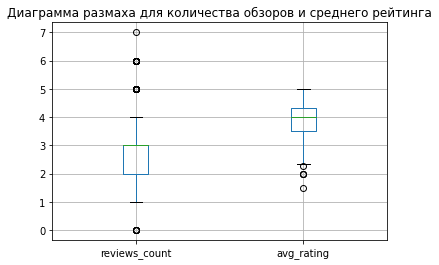

In [8]:
query2 = '''
SELECT b.book_id, b.title, COUNT(DISTINCT r.review_id) AS reviews_count, AVG(rt.rating) AS avg_rating
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY avg_rating DESC;
'''
result2 = get_sql_data(query2)

# Выводим таблицу
display(result2)

# Создаем boxplot для столбцов 'reviews_count' и 'avg_rating' с добавлением заголовка
plot = result2[['reviews_count', 'avg_rating']].boxplot()
plot.set_title('Диаграмма размаха для количества обзоров и среднего рейтинга')

# Показываем график
plt.show()

Большинство книг имеет до 4 обзоров и среднюю оценку не ниже 2,5 баллов. Самая высокая средняя оценка - 5, самая низкая средняя оценка у книги "Harvesting the Heart" - 1,5.

## Задача 3. Издательство с наибольшим числом книг толще 50 страниц

In [9]:
# Запросим издательство, которое выпустило наибольшее число книг толще 50 страниц
query3 = '''
SELECT p.publisher, COUNT(b.book_id) AS books_count
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY books_count DESC
LIMIT 1;
'''
result3 = get_sql_data(query3)
print("Результат задания 3:")
result3

Результат задания 3:


,publisher,books_count
0,Penguin Books,42


Больше всего книг выпустило издательство _Penguin Books_ - 42 книги.

## Задача 4. Автор с самой высокой средней оценкой книг, у которых 50 и более оценок

In [11]:
query4 = '''
-- Создаем временную таблицу popular_books для отбора книг с более чем 50 оценками
WITH popular_books AS (
    SELECT book_id
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(DISTINCT rating_id) > 50
)
SELECT
    a.author_id,
    AVG(rt.rating) AS avg_rating,
    a.author  -- Используем правильное поле для имени автора
FROM ratings rt
JOIN books b ON rt.book_id = b.book_id
JOIN authors a ON a.author_id = b.author_id
JOIN popular_books pb ON b.book_id = pb.book_id
GROUP BY a.author_id, a.author
ORDER BY avg_rating DESC;  -- Сортируем по убыванию средней оценки
'''

result_4 = pd.io.sql.read_sql(query4, con=engine)
result_4

,author_id,avg_rating,author
0,236,4.287097,J.K. Rowling/Mary GrandPré
1,402,4.264151,Markus Zusak/Cao Xuân Việt Khương
2,240,4.246914,J.R.R. Tolkien
3,376,4.192308,Louisa May Alcott
4,498,4.080645,Rick Riordan
5,621,3.901408,William Golding
6,235,3.825581,J.D. Salinger
7,469,3.789474,Paulo Coelho/Alan R. Clarke/Özdemir İnce
8,630,3.787879,William Shakespeare/Paul Werstine/Barbara A. M...
9,372,3.750000,Lois Lowry


Что имеем:
1. J.K. Rowling/Mary GrandPré - рейтинг почти 4.29
2. Markus Zusak/Cao Xuân Việt Khương - рейтинг 4.26
3. J.R.R. Tolkien - рейтинг почти 4.25

## Задача 5. Среднее количество обзоров от пользователей, поставивших больше 48 оценок

In [14]:
# Определяем SQL-запрос для нахождения обзоров от пользователей с более чем 48 оценками и расчета среднего количества обзоров
query5 = '''
WITH a_users AS (
    SELECT
        r.username
    FROM ratings r
    GROUP BY r.username
    HAVING COUNT(r.rating_id) > 48
),
a_reviews AS (
    SELECT
        r.username,
        r.review_id
    FROM reviews r
    JOIN a_users pu ON r.username = pu.username
)
SELECT
    AVG(review_count) AS avg_reviews_count
FROM (
    SELECT
        username,
        COUNT(review_id) AS review_count
    FROM a_reviews
    GROUP BY username
) AS subquery;
'''
# Выполняем запрос и получаем результат
result5 = get_sql_data(query5)
result5

,avg_reviews_count
0,24.0


Среднее количество обзоров от пользователей, поставивших более 48 оценок, равно 24.

## Выводы

В базе данных содержатся 5 таблиц:
- `books` - имеет 6 полей и 1000 записей;
- `authors` - имеет 2 поля и 636 строк;
- `publishers` - имеет 2 столбцa и 340 записей;
- `ratings` - имеет 4 столбцa и 6456 записей;
- `reviews` - имеет 4 поля и 2793 записей.

1. После 1 января 2000 года вышло 819 книг, но если учитывать и этот день, то книг будет больше.
2. Большинство книг имеет до 4 обзоров и среднюю оценку не ниже 2,5 баллов. Самая высокая средняя оценка - 5, самая низкая средняя оценка у книги "Harvesting the Heart" - 1,5.
3. Издательство `Penguin Books`	выпустило 42 книги, это максимальное количество.
4. Автор с самой высокой средней оценкой книг - `J.K. Rowling/Mary GrandPré`.
5. Среднее количество обзоров от пользователей, которые поставили больше 48 оценок, равно 24.